In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-and-ml-popularity-indexanalyzing-global-trends/Ai and Ml popularity.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/ai-and-ml-popularity-indexanalyzing-global-trends/Ai and Ml popularity.csv', encoding='latin')

In [4]:
df.head(10)

,Country,Ai and ML(Popularity),City,Ai and ML(Popularity).1,Top (Searches),Popularity,Rising (Searches),Rising (Searches) Percentage,Top (Searches).1,Popularity.1,Rising (Searches).1,Rising (Searches) Percentage.1
0,Tuvalu,NaN,Sapror,100.0,Artificial intelligence,100.0,Character.ai,5000%,ai character,100.0,chatgpt,5000%
1,Vietnam,100.0,Sil Kapra,74.0,Character.ai,14.0,ChatGPT,5000%,ai generator,48.0,chatgpt ai,5000%
2,China,72.0,Stanford,72.0,Online chat,5.0,Gemini,5000%,ai image,33.0,chat gpt,5000%
3,Romania,63.0,Shenzhen,58.0,OpenAI,4.0,AI Chatbot,5000%,ai chat,30.0,chat gpt ai,5000%
4,Samoa,NaN,Shanghai,57.0,ChatGPT,3.0,Midjourney,5000%,google ai,26.0,bard ai,5000%
5,Italy,54.0,Guangzhou,55.0,Gemini,3.0,Perplexity.ai,5000%,open ai,21.0,bard,5000%
6,Myanmar (Burma),51.0,Beijing,54.0,Leaf,3.0,Generative artificial intelligence,5000%,chatgpt ai,19.0,midjourney,5000%
7,Eritrea,NaN,Palo Alto,45.0,Artificial intelligence art,3.0,Microsoft Copilot,5000%,chatgpt,19.0,midjourney ai,5000%
8,American Samoa,NaN,Juja,43.0,AI Chatbot,2.0,DALL-E,5000%,what is ai,17.0,perplexity ai,5000%
9,Solomon Islands,NaN,Seongnam-si,41.0,Microsoft Bing,2.0,Adobe,5000%,gpt ai,17.0,perplexity,5000%


Preprocessing

In [5]:
df.rename(columns={
    'Ai and ML(Popularity)':'Country_Popularity',
    'Ai and ML(Popularity).1':'City_Popularity',
    'Top (Searches)':'Top_Searches',
    'Popularity':'Top_Searches_Popularity'
}, inplace=True)
df.drop(columns=['Rising (Searches)','Rising (Searches) Percentage','Top (Searches).1','Popularity.1','Rising (Searches).1','Rising (Searches) Percentage.1'],inplace=True)
df

,Country,Country_Popularity,City,City_Popularity,Top_Searches,Top_Searches_Popularity
0,Tuvalu,NaN,Sapror,100.0,Artificial intelligence,100.0
1,Vietnam,100.0,Sil Kapra,74.0,Character.ai,14.0
2,China,72.0,Stanford,72.0,Online chat,5.0
3,Romania,63.0,Shenzhen,58.0,OpenAI,4.0
4,Samoa,NaN,Shanghai,57.0,ChatGPT,3.0
...,...,...,...,...,...,...
245,Tokelau,NaN,NaN,NaN,NaN,NaN
246,Bouvet Island,NaN,NaN,NaN,NaN,NaN
247,Norfolk Island,NaN,NaN,NaN,NaN,NaN
248,South Georgia & South Sandwich Islands,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum()

Country                      0
Country_Popularity         178
City                        50
City_Popularity             50
Top_Searches               225
Top_Searches_Popularity    225
dtype: int64

In [7]:
df['Country_Popularity'].fillna(df['Country_Popularity'].median(), inplace=True)
df['City'].fillna('Unknown',inplace=True)
df['City_Popularity'].fillna(df['City_Popularity'].median(), inplace=True)
df['Top_Searches'].fillna('Unknown', inplace=True)
df['Top_Searches_Popularity'].fillna(df['Top_Searches_Popularity'].median(), inplace=True)

In [8]:
df.describe()

,Country_Popularity,City_Popularity,Top_Searches_Popularity
count,250.000000,250.000000,250.000000
mean,18.232000,28.176000,2.388000
std,8.680992,8.289989,6.266941
min,4.000000,21.000000,-1.000000
25%,17.000000,24.000000,2.000000
50%,17.000000,26.000000,2.000000
75%,17.000000,29.000000,2.000000
max,100.000000,100.000000,100.000000


In [9]:
top_10_countries = df.groupby('Country')['Country_Popularity'].mean().nlargest(10).reset_index()
print(top_10_countries)

top_10_cities = df.groupby('City')['City_Popularity'].mean().nlargest(10).reset_index()
print(top_10_cities)

top_10_searches = df.groupby('Top_Searches')['Top_Searches_Popularity'].mean().nlargest(10).reset_index()
print(top_10_searches)

           Country  Country_Popularity
0          Vietnam               100.0
1            China                72.0
2          Romania                63.0
3            Italy                54.0
4  Myanmar (Burma)                51.0
5      Philippines                44.0
6      South Korea                39.0
7        Singapore                35.0
8         Pakistan                33.0
9            Nepal                32.0
          City  City_Popularity
0       Sapror            100.0
1    Sil Kapra             74.0
2     Stanford             72.0
3     Shenzhen             58.0
4     Shanghai             57.0
5    Guangzhou             55.0
6      Beijing             54.0
7    Palo Alto             45.0
8         Juja             43.0
9  Seongnam-si             41.0
                  Top_Searches  Top_Searches_Popularity
0      Artificial intelligence                    100.0
1                 Character.ai                     14.0
2                  Online chat                     

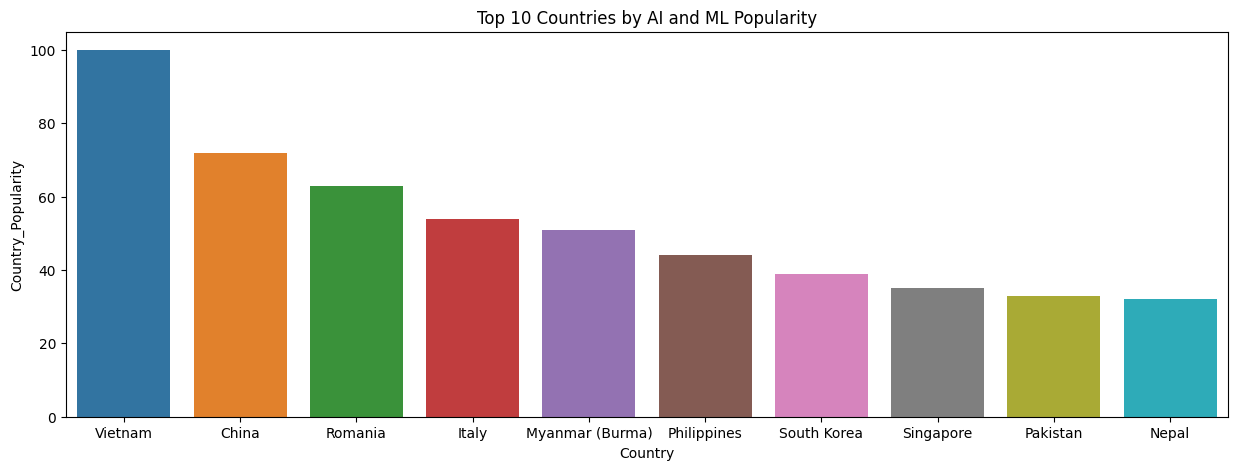

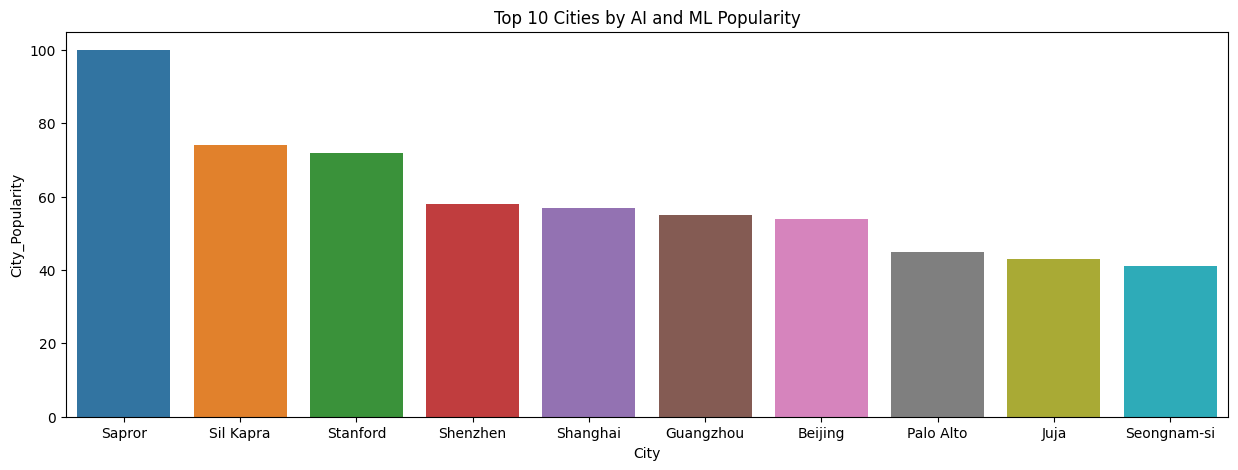

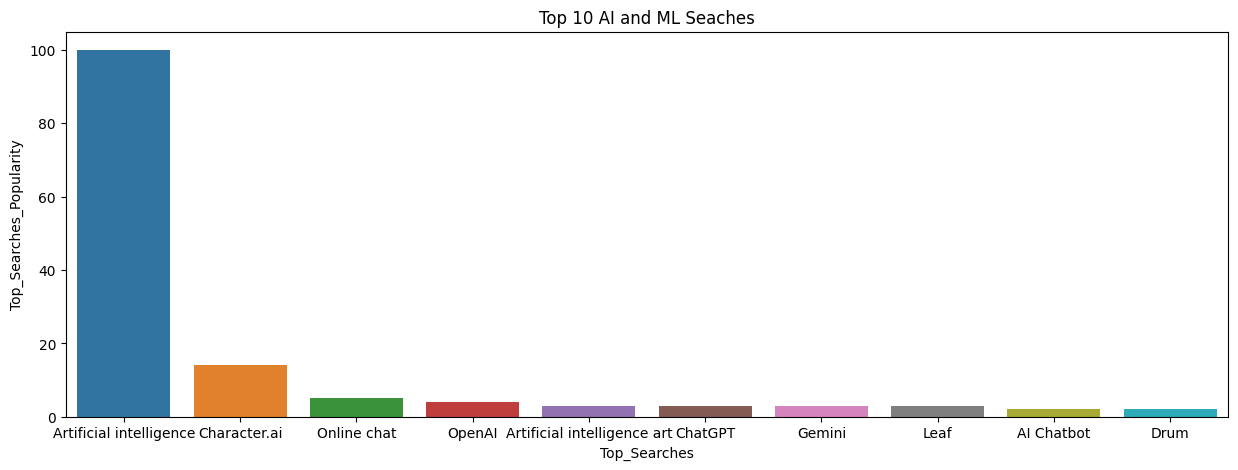

In [10]:
# Plot the popularity of AI and ML by country
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_countries, x='Country', y='Country_Popularity')  # Replace 'Popularity' with the actual column name
plt.title('Top 10 Countries by AI and ML Popularity')
plt.show()

# Plot the popularity of AI and ML by city
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_cities, x='City', y='City_Popularity')   # Replace 'Popularity' with the actual column name
plt.title('Top 10 Cities by AI and ML Popularity')
plt.show()

# Plot the popularity of AI and ML by searches
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_searches, x='Top_Searches' , y='Top_Searches_Popularity', ci=None)
plt.title('Top 10 AI and ML Seaches')
plt.show()